# Outliers and special events

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


In [2]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/instagram_natgeo.csv'
df = pd.read_csv(URL)
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']

## Ajuste com outlier

In [3]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -79.8972
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5646.36    0.00250829       162.166      0.2996      0.2996      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     193       5653.19   0.000155686       94.1098   6.982e-07       0.001      289  LS failed, Hessian reset 
     199        5653.4   0.000588089       67.1057           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       5653.75   0.000373097       147.187   4.486e-06       0.001      400  LS failed, Hessian reset 
     299       5653.86   2.20684e-05       57.6248       0.432       0.432      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       5653.86   5.30474e-06       70.5051   6.697e-08       0.001      554  LS failed, Hessian rese

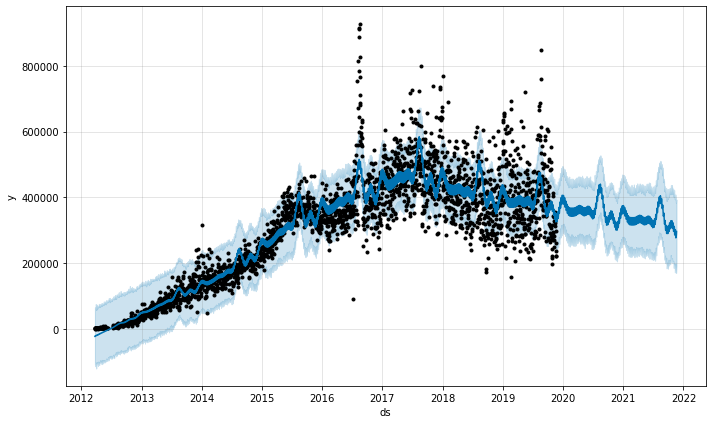

In [4]:
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

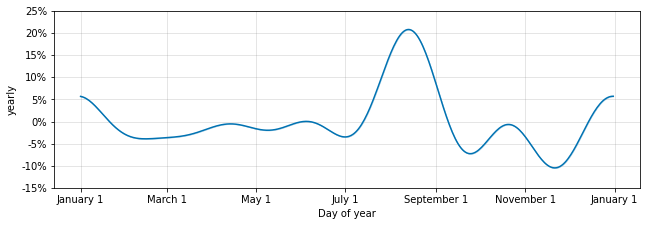

In [7]:
from prophet.plot import plot_yearly

plot_yearly(model, figsize=(10.5, 3.25))
plt.show()

## Retirando o outlier

In [8]:
df2 = df[(df['ds'] < '2016-07-29') | (df['ds'] > '2016-09-01')]

In [9]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -88.8124


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5509.12    0.00717507       261.021      0.1884      0.7845      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5514.7     0.0015098       73.6471           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260       5516.73   0.000284429       181.326   3.391e-06       0.001      379  LS failed, Hessian reset 
     299       5517.45   0.000680743       63.8465      0.7573      0.7573      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     376       5518.59    0.00148505       325.987   1.126e-05       0.001      545  LS failed, Hessian reset 
     399       5519.25    0.00313653       79.3524           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha

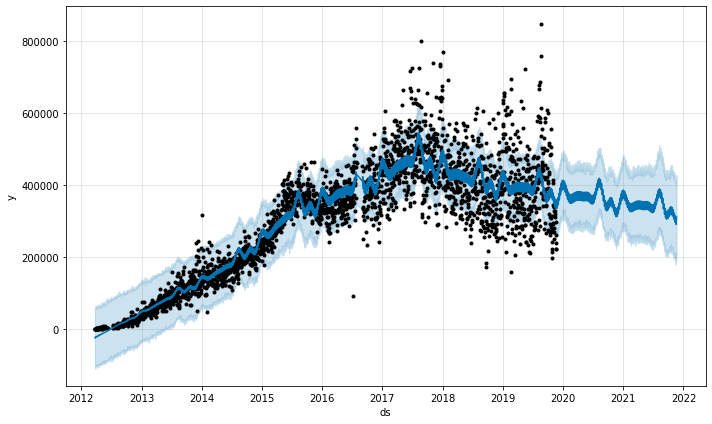

In [10]:
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

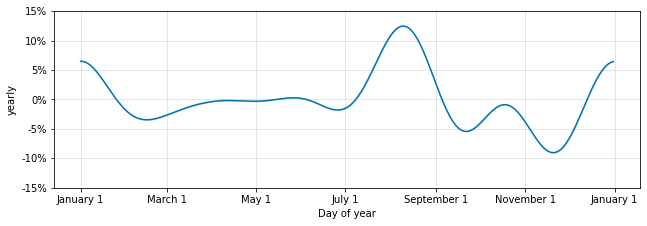

In [11]:
plot_yearly(model, figsize=(10.5, 3.25))
plt.show()

## Correcting outliers that cause wide uncertainty intervals

In [12]:
df3 = df.copy()
df3.loc[df3['ds'].dt.year == 2016, 'y'] = 100000

In [13]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -74.3427


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4889.87     0.0198504       828.884      0.1552           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        4948.4   0.000965937       411.195      0.4947      0.4947      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4978.97    0.00559639       239.448      0.6841      0.6841      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4992.14    0.00908172       201.372           1           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     420       4995.07   0.000167975       72.4203   8.602e-07       0.001      557  LS failed, Hessian reset 
     457       4996.28    0.00122554       219.023   1.412e-05       0.001      6

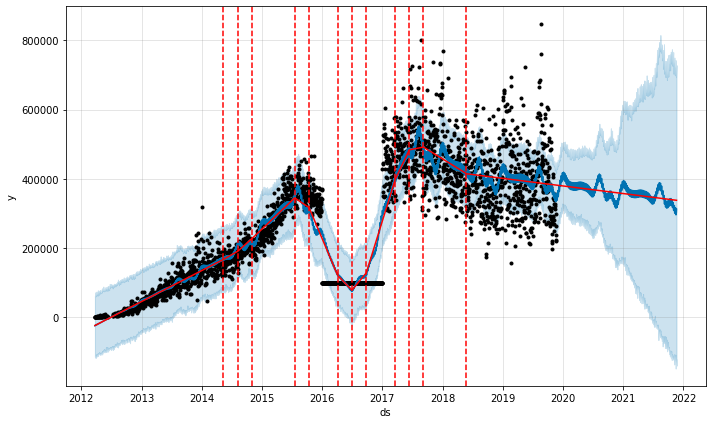

In [14]:
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [15]:
df3.loc[df3['ds'].dt.year == 2016, 'y'] = None

In [16]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -74.1685


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4791.32    0.00102043       153.299       0.822       0.822      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4799.72    0.00106453       93.7073      0.9809      0.9809      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       4800.35   0.000115752       82.7079   1.205e-06       0.001      318  LS failed, Hessian reset 
     285       4801.21   0.000300093       182.157    2.93e-06       0.001      443  LS failed, Hessian reset 
     299       4801.55   0.000844695       140.189      0.9909      0.9909      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     367       4802.34   0.000171371       117.774   1.757e-06       0.001      585  LS failed, Hessian reset 
     399       4803.08   0.000466757  

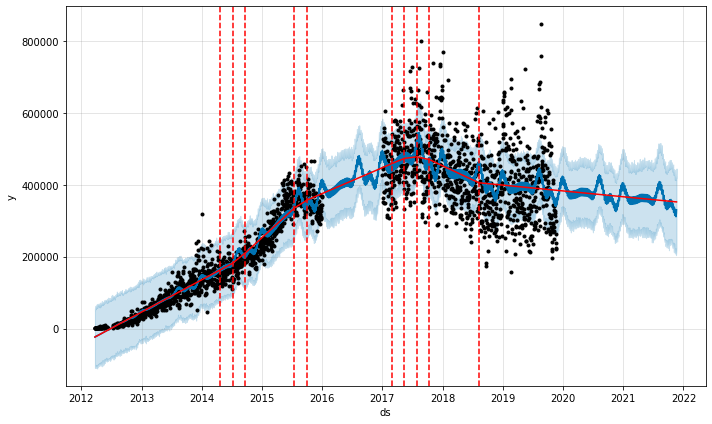

In [17]:
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()